<a href="https://colab.research.google.com/github/DileepJunuri/Blinkit-E-Commerce/blob/main/linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
df.shape


(4340, 8)

In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
print(df['owner'].value_counts())
print(df['fuel'].value_counts())
print(df['seller_type'].value_counts())


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


In [ ]:
s_scaler=StandardScaler()
df['selling_price']=s_scaler.fit_transform(df[['selling_price']])
df['km_driven']=s_scaler.fit_transform(df[['km_driven']])
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,-0.767746,0.081139,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,-0.638096,-0.347689,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,0.165731,0.724381,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,-0.439300,-0.433455,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,-0.093568,1.603479,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,-0.162716,0.295553,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,-0.162716,0.295553,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,-0.681313,0.359877,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,0.623827,0.509967,Diesel,Individual,Manual,First Owner


In [ ]:
l_coder=LabelEncoder()
for column in df.columns[4:8]:
    l_coder = LabelEncoder()
    df[column] = l_coder.fit_transform(df[column])

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,-0.767746,0.081139,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,-0.638096,-0.347689,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,0.165731,0.724381,1,1,1,0
3,Datsun RediGO T Option,2017,-0.439300,-0.433455,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,-0.093568,1.603479,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,-0.162716,0.295553,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,-0.162716,0.295553,1,1,1,2
4337,Maruti 800 AC BSIII,2009,-0.681313,0.359877,4,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,0.623827,0.509967,1,1,1,0


In [ ]:
x=df.drop(labels=["selling_price","name"],axis=1)
y=df["selling_price"]

In [ ]:
t_split=train_test_split(x,y,test_size=0.5,random_state=2)
x_train,x_test,y_train,y_test=t_split


In [ ]:
l_g=LinearRegression()
l_g.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_train_pred=l_g.predict(x_train)
y_test_pred=l_g.predict(x_test)
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.6984807902253946
0.41596974031487527
0.4407020796820448
0.4444166005146526


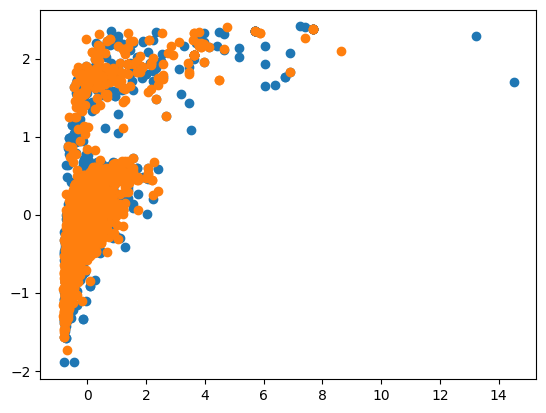

In [ ]:
plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_test_pred)
